# Project: Investigate a dataset of Medical Appointments

# Table of Contents

Introduction,
Data Wrangling,
Exploratory Data Analysis,
Conclusions

# Introduction

In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib 

In [22]:
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Dataset Descriptions

In [23]:
df.shape

(110527, 14)

In [24]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Data Cleaning

In [25]:
#drop these columns as we are not going to use it.
df.drop(['PatientId', 'AppointmentID','ScheduledDay','AppointmentDay', 'Handcap'], axis=1, inplace= True)


In [26]:
# during the analysis, we found that age have some rows with values less than 1. we need to make sure before droping them.
df.nsmallest(10, ['Age'])

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
99832,F,-1,ROMÃO,0,0,0,0,0,No
59,F,0,CONQUISTA,0,0,0,0,0,No
63,M,0,SÃO BENEDITO,0,0,0,0,0,No
64,M,0,ILHA DAS CAIEIRAS,0,0,0,0,1,No
65,M,0,CONQUISTA,0,0,0,0,0,No
67,F,0,NOVA PALESTINA,0,0,0,0,0,No
89,M,0,MONTE BELO,0,0,0,0,0,No
101,M,0,BONFIM,0,0,0,0,0,No
104,F,0,SANTO ANTÔNIO,0,0,0,0,0,Yes
132,M,0,PRAIA DO SUÁ,0,0,0,0,1,Yes


In [27]:
#Age had some columns of  "-1" and "0". Need to remove it as it's not going to helpful at all. 
df = df.drop(df[df.Age < 1].index)

In [28]:
#rename the column name as it's going ti be easy for further analysis
df.rename(columns={'No-show':'No_show'}, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         106987 non-null  object
 1   Age            106987 non-null  int64 
 2   Neighbourhood  106987 non-null  object
 3   Scholarship    106987 non-null  int64 
 4   Hipertension   106987 non-null  int64 
 5   Diabetes       106987 non-null  int64 
 6   Alcoholism     106987 non-null  int64 
 7   SMS_received   106987 non-null  int64 
 8   No_show        106987 non-null  object
dtypes: int64(6), object(3)
memory usage: 8.2+ MB


In [30]:
# description of dataset for further analysis
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received
count,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,38.316085,0.101031,0.203772,0.074243,0.031406,0.323264
std,22.466214,0.301371,0.402804,0.262167,0.174412,0.467725
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
#replaced "No" and "Yes" to "0" and "1" respectively, as it would be easier in that way
df.No_show.replace(to_replace=['No', 'Yes'], value=[0, 1], inplace=True)

In [32]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0


# Histograms with EDA

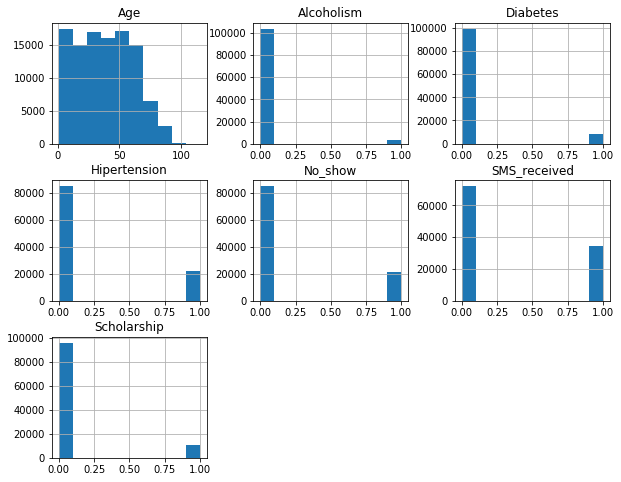

In [33]:
df.hist(figsize=(10,8));

# As histogram shows us there is a big difference between having a scholarship and not having a scholarship. Let's see the age distribution for scholarship. 

In [34]:
With_Scholarship=df.Scholarship == True
Without_Scholarship= df.Scholarship == False

In [35]:
df.Age[With_Scholarship].mean()

30.76353039134055

In [36]:
df.Age[Without_Scholarship].mean()

39.16488178169644

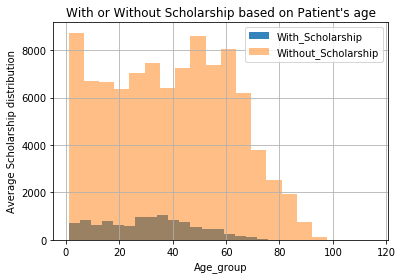

In [54]:
df.Age[With_Scholarship].hist(alpha=0.9, bins=20, label= 'With_Scholarship')
df.Age[Without_Scholarship].hist(alpha=0.5,bins=20,  label= 'Without_Scholarship')
plt.legend()
plt.title('With or Without Scholarship based on Patient\'s age')
plt.xlabel('Age_group')
plt.ylabel('Average Scholarship distribution');

We can say that majority of group doesn't have a scholarship. Let's see, the diseases distribution for not having a scholarship class.

# Hipertension Histogram based on their age

In [38]:
Hipertension=df.Hipertension == True
No_Hipertension= df.Hipertension == False


In [39]:
df.Age[Hipertension].mean()

60.61359570661896

In [40]:
df.Age[No_Hipertension].mean()

32.609654168525346

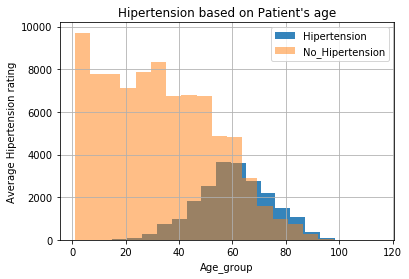

In [53]:
df.Age[Hipertension].hist(alpha=0.9, bins=20, label= 'Hipertension')
df.Age[No_Hipertension].hist(alpha=0.5,bins=20,  label= 'No_Hipertension')
plt.legend()
plt.title('Hipertension based on Patient\'s age')
plt.xlabel('Age_group')
plt.ylabel('Average Hipertension rating');

# Diabetes Histogram based on their age

In [42]:
Diabetes=df.Diabetes == True
No_Diabetes= df.Diabetes == False


In [43]:
df.Age[Diabetes].mean()

61.37252927105627

In [44]:
df.Age[No_Diabetes].mean()

36.46703485319656

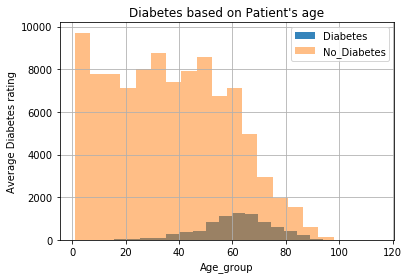

In [52]:
df.Age[Diabetes].hist(alpha=0.9, bins=20, label= 'Diabetes')
df.Age[No_Diabetes].hist(alpha=0.5,bins=20,  label= 'No_Diabetes')
plt.legend()
plt.title('Diabetes based on Patient\'s age')
plt.xlabel('Age_group')
plt.ylabel('Average Diabetes rating');

# Alcoholism Histogram based on their age

In [46]:
Alcoholism=df.Alcoholism == True
No_Alcoholism= df.Alcoholism == False


In [47]:
df.Age[Alcoholism].mean()

49.59375

In [48]:
df.Age[No_Alcoholism].mean()

37.95041832726992

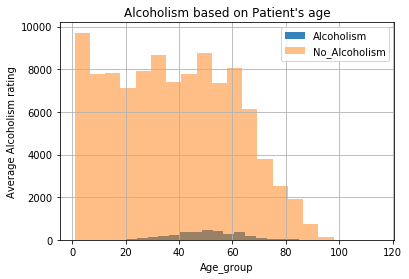

In [51]:
df.Age[Alcoholism].hist(alpha=0.9, bins=20, label= 'Alcoholism')
df.Age[No_Alcoholism].hist(alpha=0.5,bins=20,  label= 'No_Alcoholism')
plt.legend()
plt.title('Alcoholism based on Patient\'s age')
plt.xlabel('Age_group')
plt.ylabel('Average Alcoholism rating');

# Analysis using Groupby

In [165]:
df.groupby('No_show').mean().Scholarship

No_show
0    0.096569
1    0.118589
Name: Scholarship, dtype: float64

In [166]:
df.describe().Age

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

In [167]:
bin_edges = [1.00, 19.00, 38.00, 56.00, 115.00]

In [168]:
bin_names = ['Teenage', 'Young', 'Mid_age', 'Oldage']

In [272]:
df['Age_distribution'] = pd.cut(df['Age'], bin_edges, labels=bin_names)


df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No_show,Age_distribution
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,Oldage
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,Mid_age
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,Oldage
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Teenage
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,Mid_age


In [273]:
df.groupby('Age_distribution').mean().No_show

Age_distribution
Teenage    0.231188
Young      0.231946
Mid_age    0.193148
Oldage     0.156171
Name: No_show, dtype: float64

In [274]:
df.to_csv('noshowappointments-kagglev2-may-2016_edited.csv', index=False)

# Which age-group patients doesn't show up? let's find out!

In [275]:
median = df['Age'].median()
median

38.0

In [196]:
below_38 = df.query('Age < {}'.format(median))
above_38 = df.query('Age >= {}'.format(median))

below__38 = below_38['No_show'].mean()
above__38 = above_38['No_show'].mean()


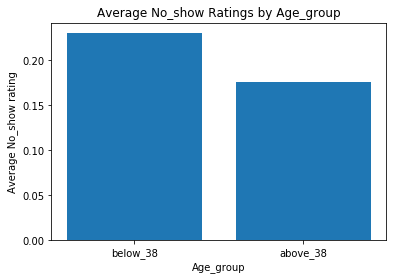

In [201]:
locations = [1, 2]
heights = [below__38, above__38]
labels = ['below_38', 'above_38']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average No_show Ratings by Age_group')
plt.xlabel('Age_group')
plt.ylabel('Average No_show rating');

# Which gender have a more no show ratio?

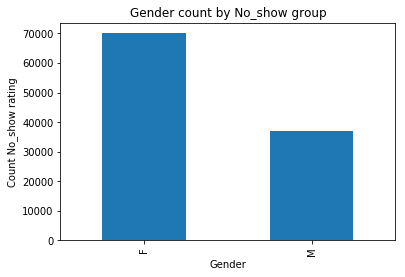

In [267]:
df.groupby('Gender').No_show.count().plot(kind='bar')
plt.title('Gender count by No_show group')
plt.xlabel('Gender')
plt.ylabel('Count No_show rating');

# Gender vise distribution with Age_distribution for No_show

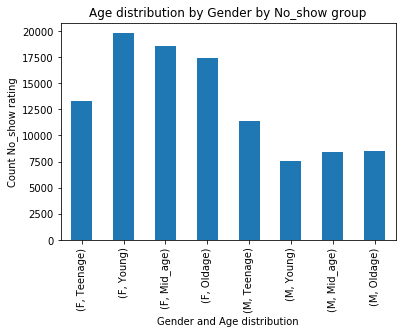

In [283]:
df.groupby(['Gender', 'Age_distribution']).No_show.count().plot(kind='bar')
plt.title('Age distribution by Gender by No_show group')
plt.xlabel('Gender and Age distribution')
plt.ylabel('Count No_show rating');
